In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/crop_yield.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


In [2]:
# Check for missing values
df.isnull().sum()

# Fill or drop missing values as appropriate
df.fillna(method='ffill', inplace=True)


<ipython-input-2-f246a61117ba>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

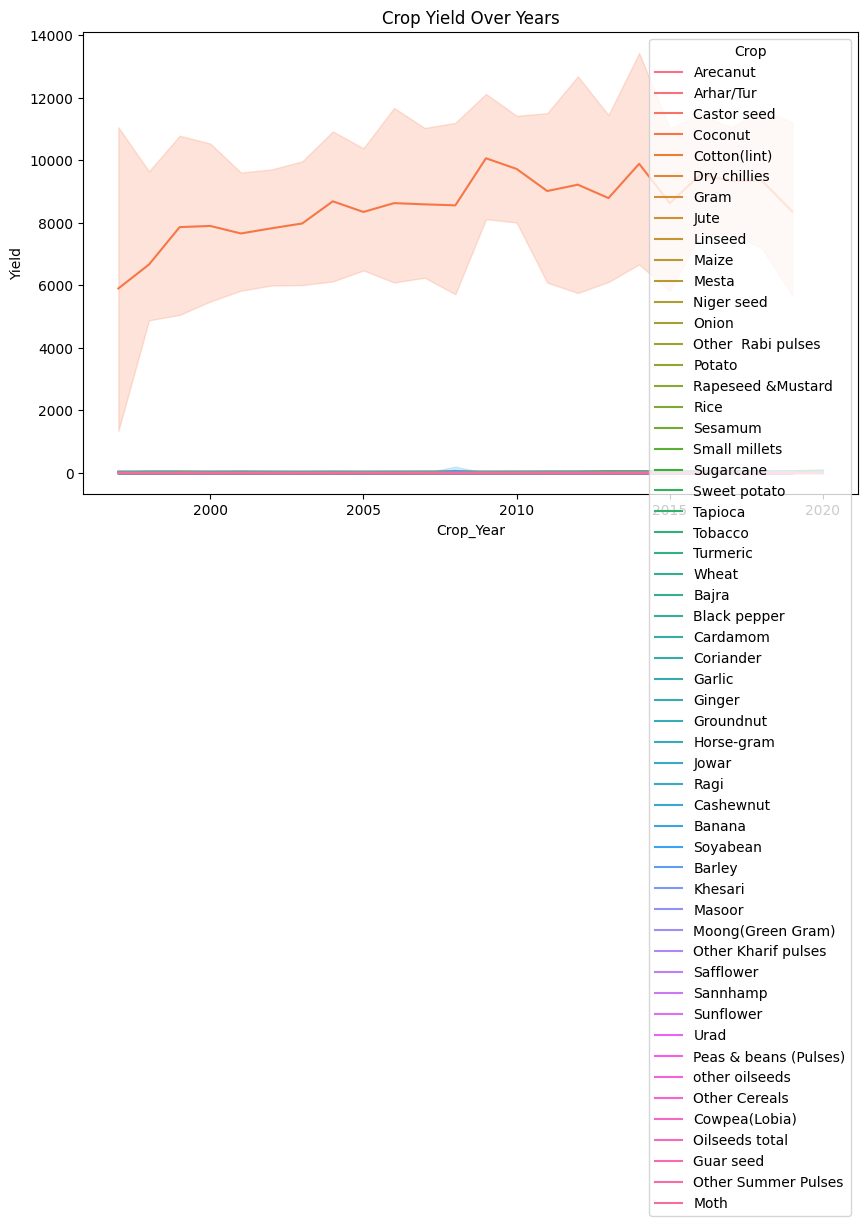

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for yield across years for different crops
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Crop_Year', y='Yield', hue='Crop')
plt.title('Crop Yield Over Years')
plt.show()


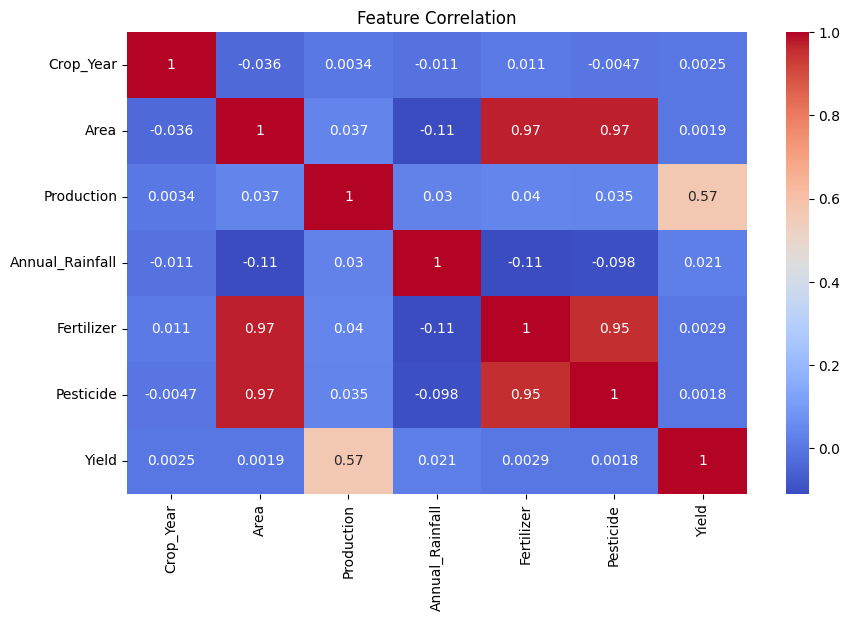

In [6]:
# Select only numerical columns for correlation
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Plot heatmap for numerical columns correlation
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [7]:
X = df[['Crop_Year', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Area']]
y = df['Yield']


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 688978.4097460253


In [9]:
# Create a future year dataframe to forecast yield
future_years = pd.DataFrame({
    'Crop_Year': [2025, 2026, 2027],  # Add upcoming years
    'Annual_Rainfall': [1200, 1150, 1180],  # Predicted rainfall values
    'Fertilizer': [80, 85, 90],  # Predicted fertilizer usage
    'Pesticide': [20, 25, 30],   # Predicted pesticide usage
    'Area': [100, 105, 110]      # Predicted crop area
})

# Forecast future yields
future_yield_predictions = model.predict(future_years)
print(f'Forecasted Yields: {future_yield_predictions}')


Forecasted Yields: [6.97177674 6.86916841 7.00665174]


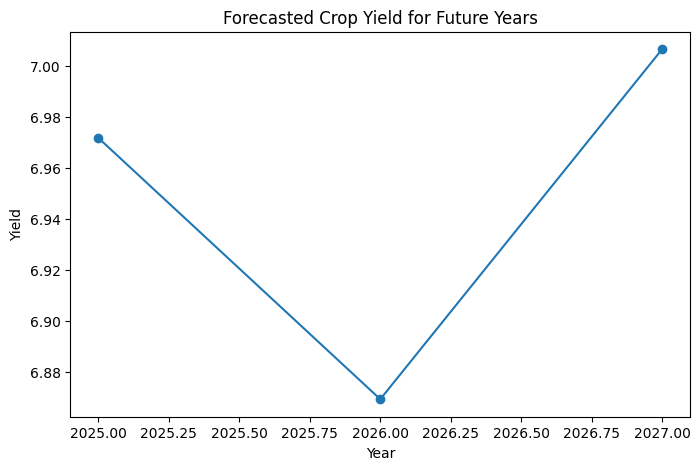

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(future_years['Crop_Year'], future_yield_predictions, marker='o')
plt.title('Forecasted Crop Yield for Future Years')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.show()
